In [3]:
import ptracer as pt
import numpy as np
from importlib import reload
from forces import ray_tracer as rtf
from tqdm.notebook import tqdm
from random import random

%matplotlib notebook
import matplotlib.pyplot as plt
%load_ext snakeviz

In [4]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [5]:
pos = np.array([0, 0, 100e-6])
m = pt.MeshTO(pos, "symmetric_rotated.obj", 5e-6, n_in=1.52)
m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 100, 532, pos+[0,0,-5.1e-6], 5e-6)
s = pt.Scene(rf, [m])
s.run(limit=100)
s.propagate(1e-6)
print(s.momentum)

[ 5.87784217e+07 -8.88883891e+06  3.17719639e+14]


In [6]:
np.sum(s.r_dirs, axis=0)

array([2.60731667e-05, 9.61485458e-05, 1.13127505e+01])

<IPython.core.display.Javascript object>


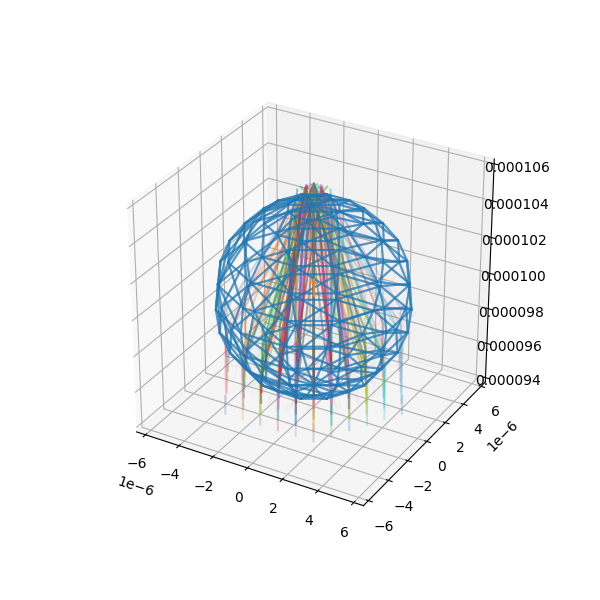

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, m_quiver=True, m_quiver_kwargs={"zorder":10, "color": "tab:orange"})

In [8]:
def rangle():
    return 2*np.pi*random()

In [14]:
moms = []
poss = []
intensity = []
xs = np.linspace(-2e-6, 2e-6, 11)
ys = np.linspace(-2e-6, 2e-6, 11)
for x in tqdm(xs):
    intensity.append([])
    for y in ys:
        pos = np.array([x, y, 200e-6])
        poss.append(pos)
        m = pt.MeshTO(pos, "six.obj", 5e-6, n_in=1.52)
        m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
        rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 301, 532, pos+[0,0,-5.1e-6], 5e-6, random_switch=True)
        intensity[-1].append(np.sum(rf.weights) * 6.62607004e-25 * 299792458 / 532)
        s = pt.Scene(rf, [m])
        s.run(limit=5)
        moms.append(s.momentum)
#         print(np.sum(s.r_dirs, axis=0))
#         print(s.momentum)
#         print(moms)
#         print("-"*15)
moms = np.array(moms)
poss = np.array(poss)

<IPython.core.display.Javascript object>


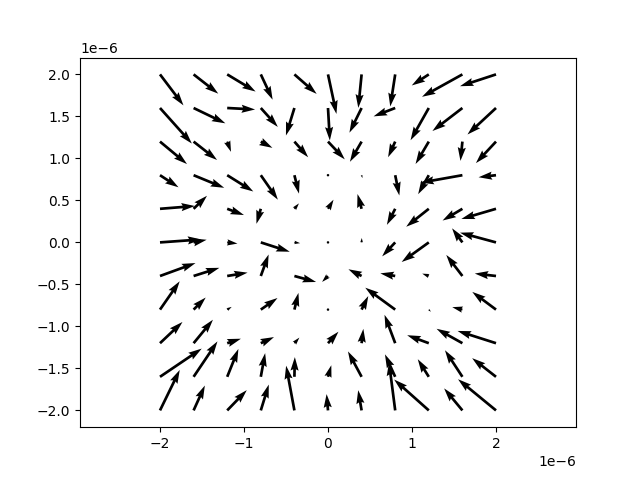

(-2.2e-06, 2.2e-06, -2.2e-06, 2.2e-06)

In [15]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid(xs, ys)
ax.quiver(poss[:,0], poss[:,1], moms[:,0], moms[:,1])
ax.axis("equal")

<IPython.core.display.Javascript object>


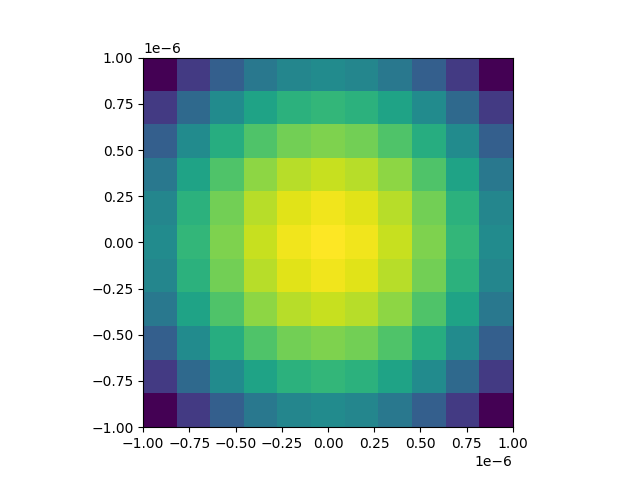

In [135]:
fig, ax = plt.subplots()
ax.imshow(intensity, extent=(-1e-6, 1e-6, -1e-6, 1e-6))

# Smooth shading

In [337]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [338]:
m2 = pt.SmoothMeshTO([2.2,0,0], "six_normals.obj", 1, n_in=1.52, reflective=True)

<IPython.core.display.Javascript object>


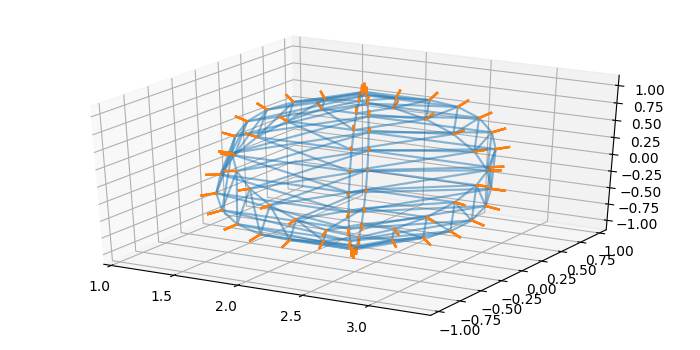

In [339]:
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111, projection='3d')
m2.plot(ax)
plt.tight_layout()
# ax.set_xlim(-1,3.2)
# ax.set_ylim(-1,1)
# ax.set_zlim(-1,1)

In [326]:
m = pt.MeshTO([0,0,0], "six_normals.obj", 1, n_in=1.52, reflective=True)
m2 = pt.SmoothMeshTO([2.2,0,0], "six_normals.obj", 1, n_in=1.52, reflective=True)
# rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 1, 300e-3, 300, 532, [0,0,-2], 1)
rf = pt.BasicRF(np.linspace(-1,-0.5,25),0,-1.5, [0,0,1]) + pt.BasicRF(np.linspace(-1+2.2,-0.5+2.2,25),0,-1.5, [0,0,1])
s = pt.Scene(rf, [m,m2])
s.run(limit=1)
s.propagate(.3)
print(s.momentum)

[ 3.51308031e-02 -5.86087631e-05  3.37677450e-02]


<IPython.core.display.Javascript object>


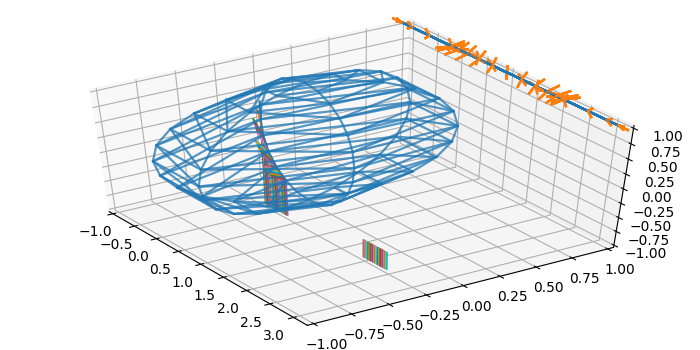

(-1.0, 1.0)

In [327]:
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax)
plt.tight_layout()
ax.set_xlim(-1,3.2)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

# Torus

In [365]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [16]:
# %%snakeviz
m = pt.SmoothMeshTO([0,0,0], "torus.obj", 1, n_in=1.52, reflective=False)
rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 1, 300e-3, 300, 532, [0,0,-1.5], 1)
# rf = pt.BasicRF(np.linspace(-1,-0.5,25),0,-1.5, [0,0,1]) + pt.BasicRF(np.linspace(-1+2.2,-0.5+2.2,25),0,-1.5, [0,0,1])
s = pt.Scene(rf, [m])
s.run(limit=5)
s.propagate(.1)
print(s.momentum)

[2.19735502e+08 4.04159881e+08 1.67060895e+14]


<IPython.core.display.Javascript object>


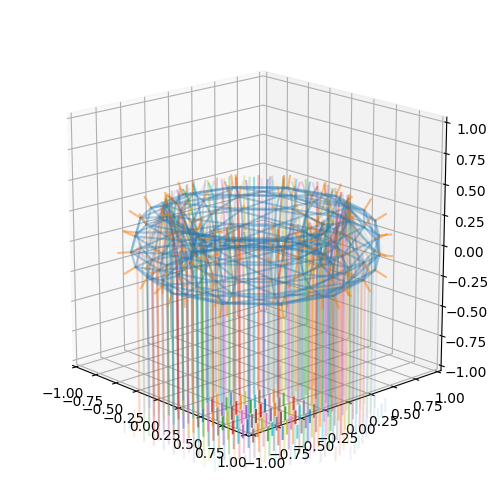

(-1.0, 1.0)

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, show_weight=True)
plt.tight_layout()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

# Cylinder

In [317]:
m = pt.SmoothMeshTO([0,0,0], "cylinder.obj", 1, n_in=1.52, reflective=False)
rf = pt.HexagonalGaussianRF([0,0,0], [0,.5,1], 1, 300e-3, 300, 532, [0,-.5,-1.5], 1)
# rf = pt.BasicRF(np.linspace(-1,-0.5,25),0,-1.5, [0,0,1]) + pt.BasicRF(np.linspace(-1+2.2,-0.5+2.2,25),0,-1.5, [0,0,1])
s = pt.Scene(rf, [m])
s.run(limit=5)
s.propagate(.1)
print(s.momentum)

[2.29113823e+08 1.28506743e+14 2.32442193e+14]


<IPython.core.display.Javascript object>


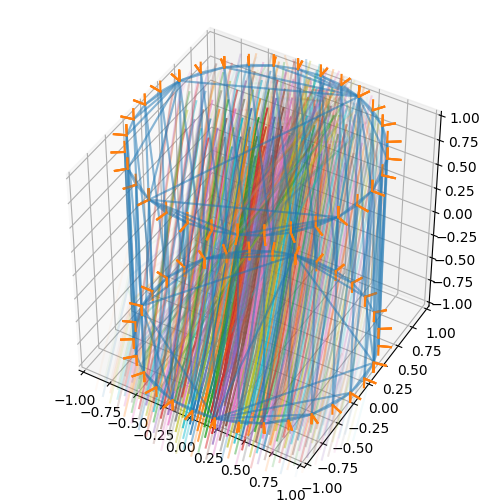

(-1.0, 1.0)

In [318]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, show_weight=True)
plt.tight_layout()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)